TUGAS PRAKTIKUM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [2]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('insurance.csv')
# Menampilkan info kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Menggunakan Label Encoder untuk melakukan encoding agar bisa dibaca oleh komputer
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df['region'] = LabelEncoder().fit_transform(df['region'])

# Menampilkan data teratas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


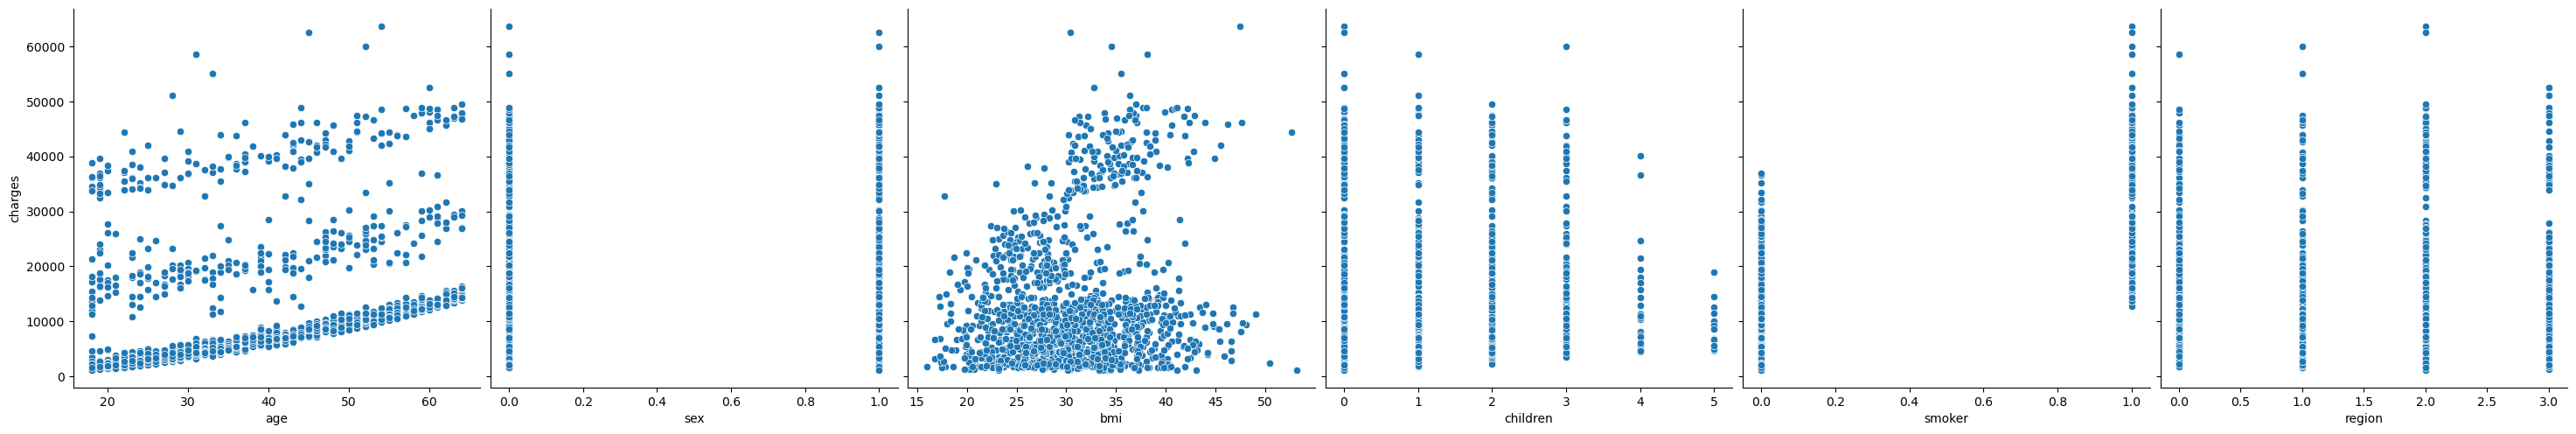

In [10]:
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker','region'],
             y_vars='charges', height=5, aspect=1, kind='scatter')
plt.show()

Variabel Bebas(Fitur):
- age (umur) - Variabel numerik menggambarkan usia seseorang.
- sex (jenis kelamin) - Variabel kategorikal yang menggambarkan jenis kelamin (misalnya, "male" atau "female").
dsini 0 dan 1
- bmi (Indeks Massa Tubuh) - Variabel numerik menggambarkan Indeks Massa Tubuh seseorang.
- children (jumlah anak) - Variabel numerik yang menggambarkan jumlah anak yang tercakup dalam polis asuransi.
- smoker (perokok) - Variabel kategorikal yang menggambarkan apakah seseorang adalah perokok atau bukan.
- region (wilayah) - Variabel kategorikal menggambarkan wilayah tempat tinggal seseorang.

Variabel Target (Biaya) adalah :
- charges (biaya) - Variabel numerik yang merupakan target dari analisis, yaitu biaya medis pribadi yang perlu diprediksi.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [5]:
# Memisahkan antara variabel fitur dan biaya
X = df[['age', 'sex', 'bmi','children', 'region', 'smoker']]
y = df['charges']

# Membagi dataset menjadi 30% untuk test, dan 70% untuk train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train
X_test
y_train
y_test

12       1826.84300
306     20177.67113
318      7421.19455
815      1877.92940
157     15518.18025
           ...     
710      1727.54000
1005     4433.38770
389      4618.07990
923      4320.41085
1164     7153.55390
Name: charges, Length: 402, dtype: float64

3. Lakukan feature scaling jika diperlukan.

In [6]:
# Import Standar Scaller
from sklearn.preprocessing import StandardScaler

# Menggunakan standart transform untuk scalling pada kolom age dan bmi
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train
X_test

array([[-1.18136226,  0.95618289,  0.69499691, -0.89471786,  1.35768477,
        -0.54476985],
       [-0.82364335, -1.04582503, -0.49171779,  0.76660583,  1.35768477,
        -0.54476985],
       [ 0.32105717, -1.04582503, -0.46677959, -0.89471786, -0.41435834,
        -0.54476985],
       ...,
       [-1.10981848, -1.04582503, -0.02563129,  1.59726768, -0.41435834,
        -0.54476985],
       [-0.39438065,  0.95618289,  0.93835942, -0.89471786, -0.41435834,
        -0.54476985],
       [ 0.10642583, -1.04582503, -0.35240781, -0.06405601, -0.41435834,
        -0.54476985]])

4. Buat model multiple linear regression menggunakan Scikit-Learn.

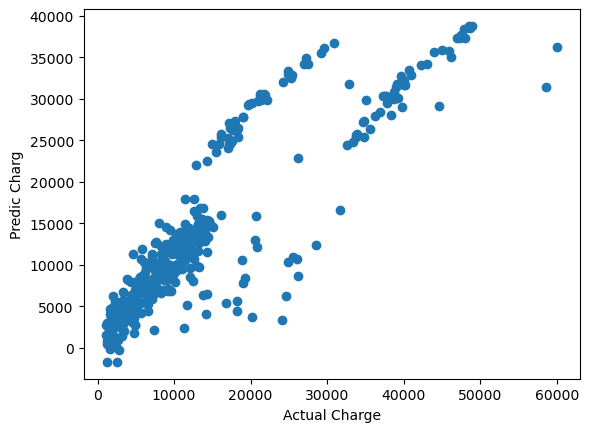

In [11]:
# Import model linear regresion dari sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_train=model.predict(X_test)
plt.scatter(y_test, y_train)
plt.xlabel("Actual Charge")
plt.ylabel("Predic Charg")
plt.show()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [8]:
# Melatih data train (latih)
model.fit(X_train, y_train)

# Melatih data test (uji)
prediction = model.predict(X_test)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [12]:
#Imporrt library mse, mae, dan r2_score dari sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung R-squared
r2 = r2_score(y_test, prediction)

# Menghitung MSE
mse = mean_squared_error(y_test, prediction)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung MAE
mae = mean_absolute_error(y_test, prediction)

print("R-squared : ", r2)
print("MSE : ", mse)
print("RMSE:", rmse)
print("MAE : ", mae)

R-squared :  0.7801104348699103
MSE :  31927456.88747651
RMSE: 5650.438645581112
MAE :  3840.702176295592
